In [1]:
!git clone https://github.com/CSE-151A-Group-Wildfire/CSE-151A-Project.git

Cloning into 'CSE-151A-Project'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 34 (delta 8), reused 5 (delta 0), pack-reused 0
Receiving objects: 100% (34/34), 9.20 MiB | 4.49 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing

In [3]:
weather = pd.read_csv('CSE-151A-Project/weather.csv')

<ipython-input-3-6e86225cef77>:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv('CSE-151A-Project/weather.csv')


In [4]:
print(weather.columns)

Index(['Date', 'Time', 'date_time', 'altimeter', 'air_temp',
       'relative_humidity', 'wind_speed', 'sea_level_pressure',
       'weather_cond_code', 'visibility', 'wind_direction',
       'precip_accum_three_hour', 'wind_gust', 'precip_accum_one_hour',
       'pressure_tendency', 'cloud_layer_1_code', 'cloud_layer_2_code',
       'cloud_layer_3_code', 'precip_accum_six_hour', 'precip_accum_24_hour',
       'pressure_change_code', 'air_temp_high_6_hour', 'air_temp_low_6_hour',
       'peak_wind_speed', 'air_temp_high_24_hour', 'air_temp_low_24_hour',
       'ceiling', 'dew_point_temperature', 'peak_wind_direction', 'metar',
       'metar_origin', 'pressure', 'Unnamed: 32', 'wet_bulb_temp',
       'wind_cardinal_direction', 'weather_condition', 'weather_summary',
       'cloud_layer_1', 'cloud_layer_2', 'cloud_layer_3', 'wind_chill',
       'Unnamed: 41', 'heat_index'],
      dtype='object')


In [5]:
weather.shape

(261079, 43)

Droping unnecessary columns

In [6]:
dropped_list = ['Unnamed: 32', 'Unnamed: 41', 'metar', 'metar_origin', 'pressure_change_code',
                   'weather_cond_code', 'pressure_change_code', 'visibility',
                   'cloud_layer_1', 'cloud_layer_2', 'cloud_layer_3',
                   'wind_cardinal_direction', 'cloud_layer_1_code',
                   'cloud_layer_2_code', 'cloud_layer_3_code', 'heat_index']
weather = weather.drop(columns= dropped_list)

Making sure the "air_temp" column doesn't have any missing values

In [7]:
weather = weather.dropna(subset=['air_temp'])

Filling in the missing values only in numeric columns with their mean

In [8]:
number_columns = list(weather.select_dtypes(include=[np.number]).columns)
weather[number_columns] = weather[number_columns].fillna(weather[number_columns].mean())

Convert 'air_temp' to numeric if it's not already

In [9]:
weather['air_temp'] = pd.to_numeric(weather['air_temp'], errors='coerce')

Extract date and time components

In [10]:
weather['date_time'] = pd.to_datetime(weather['date_time'])
weather['year'] = weather['date_time'].dt.year
weather['month'] = weather['date_time'].dt.month
weather['day'] = weather['date_time'].dt.day
weather['hour'] = weather['date_time'].dt.hour

<ipython-input-10-c18c257407a8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather['date_time'] = pd.to_datetime(weather['date_time'])


Calculate hourly average temperature

In [12]:
hourly_avg_temp = weather.groupby(['year', 'month', 'day', 'hour', 'sea_level_pressure', 'relative_humidity'])['air_temp'].mean().reset_index()
hourly_avg_temp.rename(columns={'air_temp': 'hourly_avg_temp'}, inplace=True)
wind_column= weather.groupby(['wind_speed'])['air_temp'].median().reset_index()
wind_column.rename(columns={'air_temp': 'hourly_avg_temp'}, inplace=True)

In [13]:
result = pd.merge(hourly_avg_temp, wind_column, on='hourly_avg_temp', how='left')
print(result.head())

     year  month   day  hour sea_level_pressure relative_humidity  \
0  2000.0    1.0  10.0  21.0             1018.3              56.1   
1  2000.0    1.0  10.0  22.0             1018.2              62.6   
2  2000.0    1.0  11.0   1.0             1018.3              83.2   
3  2000.0    1.0  11.0   2.0             1018.4              86.5   
4  2000.0    1.0  11.0   3.0             1018.8              93.0   

   hourly_avg_temp wind_speed  
0             64.9        NaN  
1             63.0        NaN  
2             57.0        NaN  
3             55.9        NaN  
4             54.0        NaN  


In [14]:
hourly_avg_temp

,year,month,day,hour,sea_level_pressure,relative_humidity,hourly_avg_temp
0,2000.0,1.0,10.0,21.0,1018.3,56.1,64.90
1,2000.0,1.0,10.0,22.0,1018.2,62.6,63.00
2,2000.0,1.0,11.0,1.0,1018.3,83.2,57.00
3,2000.0,1.0,11.0,2.0,1018.4,86.5,55.90
4,2000.0,1.0,11.0,3.0,1018.8,93.0,54.00
...,...,...,...,...,...,...,...
205637,2024.0,5.0,20.0,10.0,1014.5,77.52,59.00
205638,2024.0,5.0,20.0,11.0,1014.7,77.52,59.00
205639,2024.0,5.0,20.0,12.0,1014.9,77.52,59.00
205640,2024.0,5.0,20.0,13.0,1015.5,74.59,60.08


Hourly average wind

In [15]:
weather['wind_speed'] = pd.to_numeric(weather['wind_speed'], errors='coerce')
hourly_avg_wind = weather.groupby(['year', 'month', 'day', 'hour'])['wind_speed'].mean().reset_index()
hourly_avg_wind.rename(columns={'wind_speed': 'hourly_avg_wind'}, inplace=True)

Hourly average sea level

In [16]:
weather['sea_level_pressure'] = pd.to_numeric(weather['sea_level_pressure'], errors='coerce')
hourly_avg_sea = weather.groupby(['year', 'month', 'day', 'hour'])['sea_level_pressure'].mean().reset_index()
hourly_avg_sea.rename(columns={'sea_level_pressure': 'hourly_avg_sea'}, inplace=True)

Hourly average humidity

In [17]:
weather['relative_humidity'] = pd.to_numeric(weather['relative_humidity'], errors='coerce')
hourly_avg_hum = weather.groupby(['year', 'month', 'day', 'hour'])['relative_humidity'].mean().reset_index()
hourly_avg_hum.rename(columns={'relative_humidity': 'hourly_avg_hum'}, inplace=True)

Yearly Average Temperature Change

In [18]:
yearly_avg_temp = weather.groupby(['year'])['air_temp'].mean().reset_index()
yearly_avg_temp.rename(columns={'air_temp': 'year'}, inplace=True)

Calculate yearly average precipitation

In [19]:
weather['precip_accum_three_hour'] = pd.to_numeric(weather['precip_accum_three_hour'], errors='coerce')
weather_clean = weather.dropna(subset=['precip_accum_three_hour'])
yearly_avg_precip = weather_clean.groupby(['year'])['precip_accum_three_hour'].mean().reset_index()
yearly_avg_precip

,year,precip_accum_three_hour
0,2000.0,0.508222
1,2001.0,0.117647
2,2002.0,0.055854
3,2003.0,0.060308
4,2004.0,0.156604
5,2005.0,0.123086
6,2006.0,0.071375
7,2007.0,0.043800
8,2008.0,0.018348
9,2009.0,0.120040


Text(0, 0.5, 'precip_accum_three_hour')

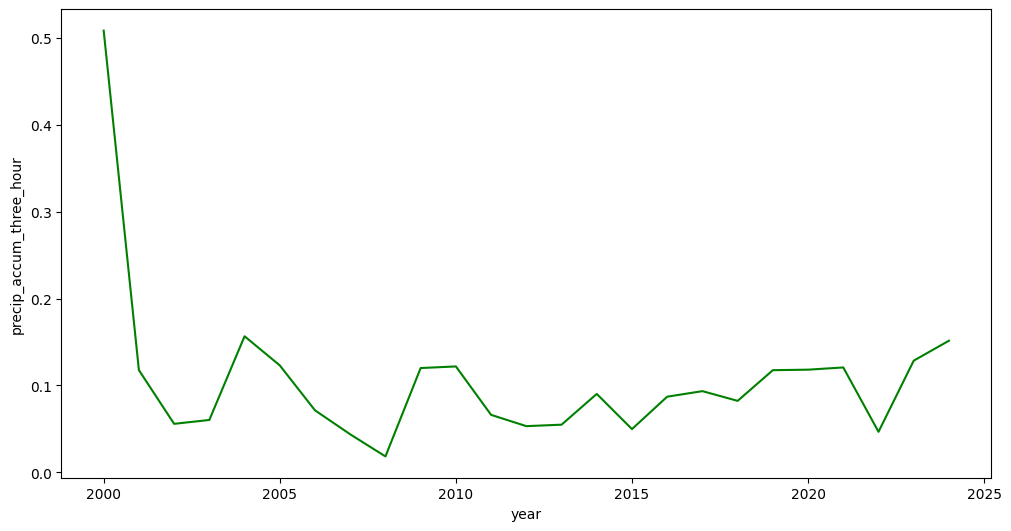

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = yearly_avg_precip.sort_values('year', ascending=True)

plt.plot(df_sorted['year'], df_sorted['precip_accum_three_hour'], color='g')
plt.xlabel('year')
plt.ylabel('precip_accum_three_hour')

Average yearly temperature

In [21]:
weather_clean = weather.dropna(subset=['air_temp'])
yearly_avg_temp = weather_clean.groupby(['year'])['air_temp'].mean().reset_index()
yearly_avg_temp

,year,air_temp
0,2000.0,62.788479
1,2001.0,61.967393
2,2002.0,62.190844
3,2003.0,63.404508
4,2004.0,63.155874
5,2005.0,62.670087
6,2006.0,64.363523
7,2007.0,63.233413
8,2008.0,63.786794
9,2009.0,63.916446


# Merge the monthly average temperature back into the original dataset

In [22]:
weather.rename(columns={'relative_humidity': 'humidity'}, inplace=True)
hourly_avg_temp.rename(columns={'relative_humidity': 'relative_humidity'}, inplace=True)

In [23]:
avg_weather_df = pd.merge(weather, hourly_avg_temp, on=['year', 'month', 'day', 'hour'], how='left')
avg_weather_df.columns

Index(['Date', 'Time', 'date_time', 'altimeter', 'air_temp', 'humidity',
       'wind_speed', 'sea_level_pressure_x', 'wind_direction',
       'precip_accum_three_hour', 'wind_gust', 'precip_accum_one_hour',
       'pressure_tendency', 'precip_accum_six_hour', 'precip_accum_24_hour',
       'air_temp_high_6_hour', 'air_temp_low_6_hour', 'peak_wind_speed',
       'air_temp_high_24_hour', 'air_temp_low_24_hour', 'ceiling',
       'dew_point_temperature', 'peak_wind_direction', 'pressure',
       'wet_bulb_temp', 'weather_condition', 'weather_summary', 'wind_chill',
       'year', 'month', 'day', 'hour', 'sea_level_pressure_y',
       'relative_humidity', 'hourly_avg_temp'],
      dtype='object')

# Scatter Plot

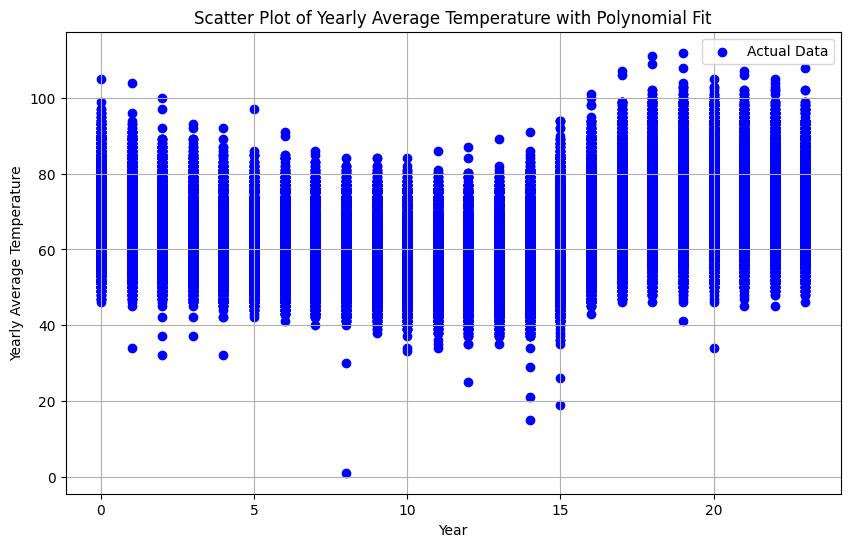

In [24]:
## Scatter Plot Graph
plt.figure(figsize=(10, 6))
plt.scatter(hourly_avg_temp['hour'], hourly_avg_temp['hourly_avg_temp'], color='blue', label='Actual Data')

plt.xlabel('Year')
plt.ylabel('Yearly Average Temperature')
plt.title('Scatter Plot of Yearly Average Temperature with Polynomial Fit')
plt.legend()
plt.grid(True)
plt.show()

# Pairplot

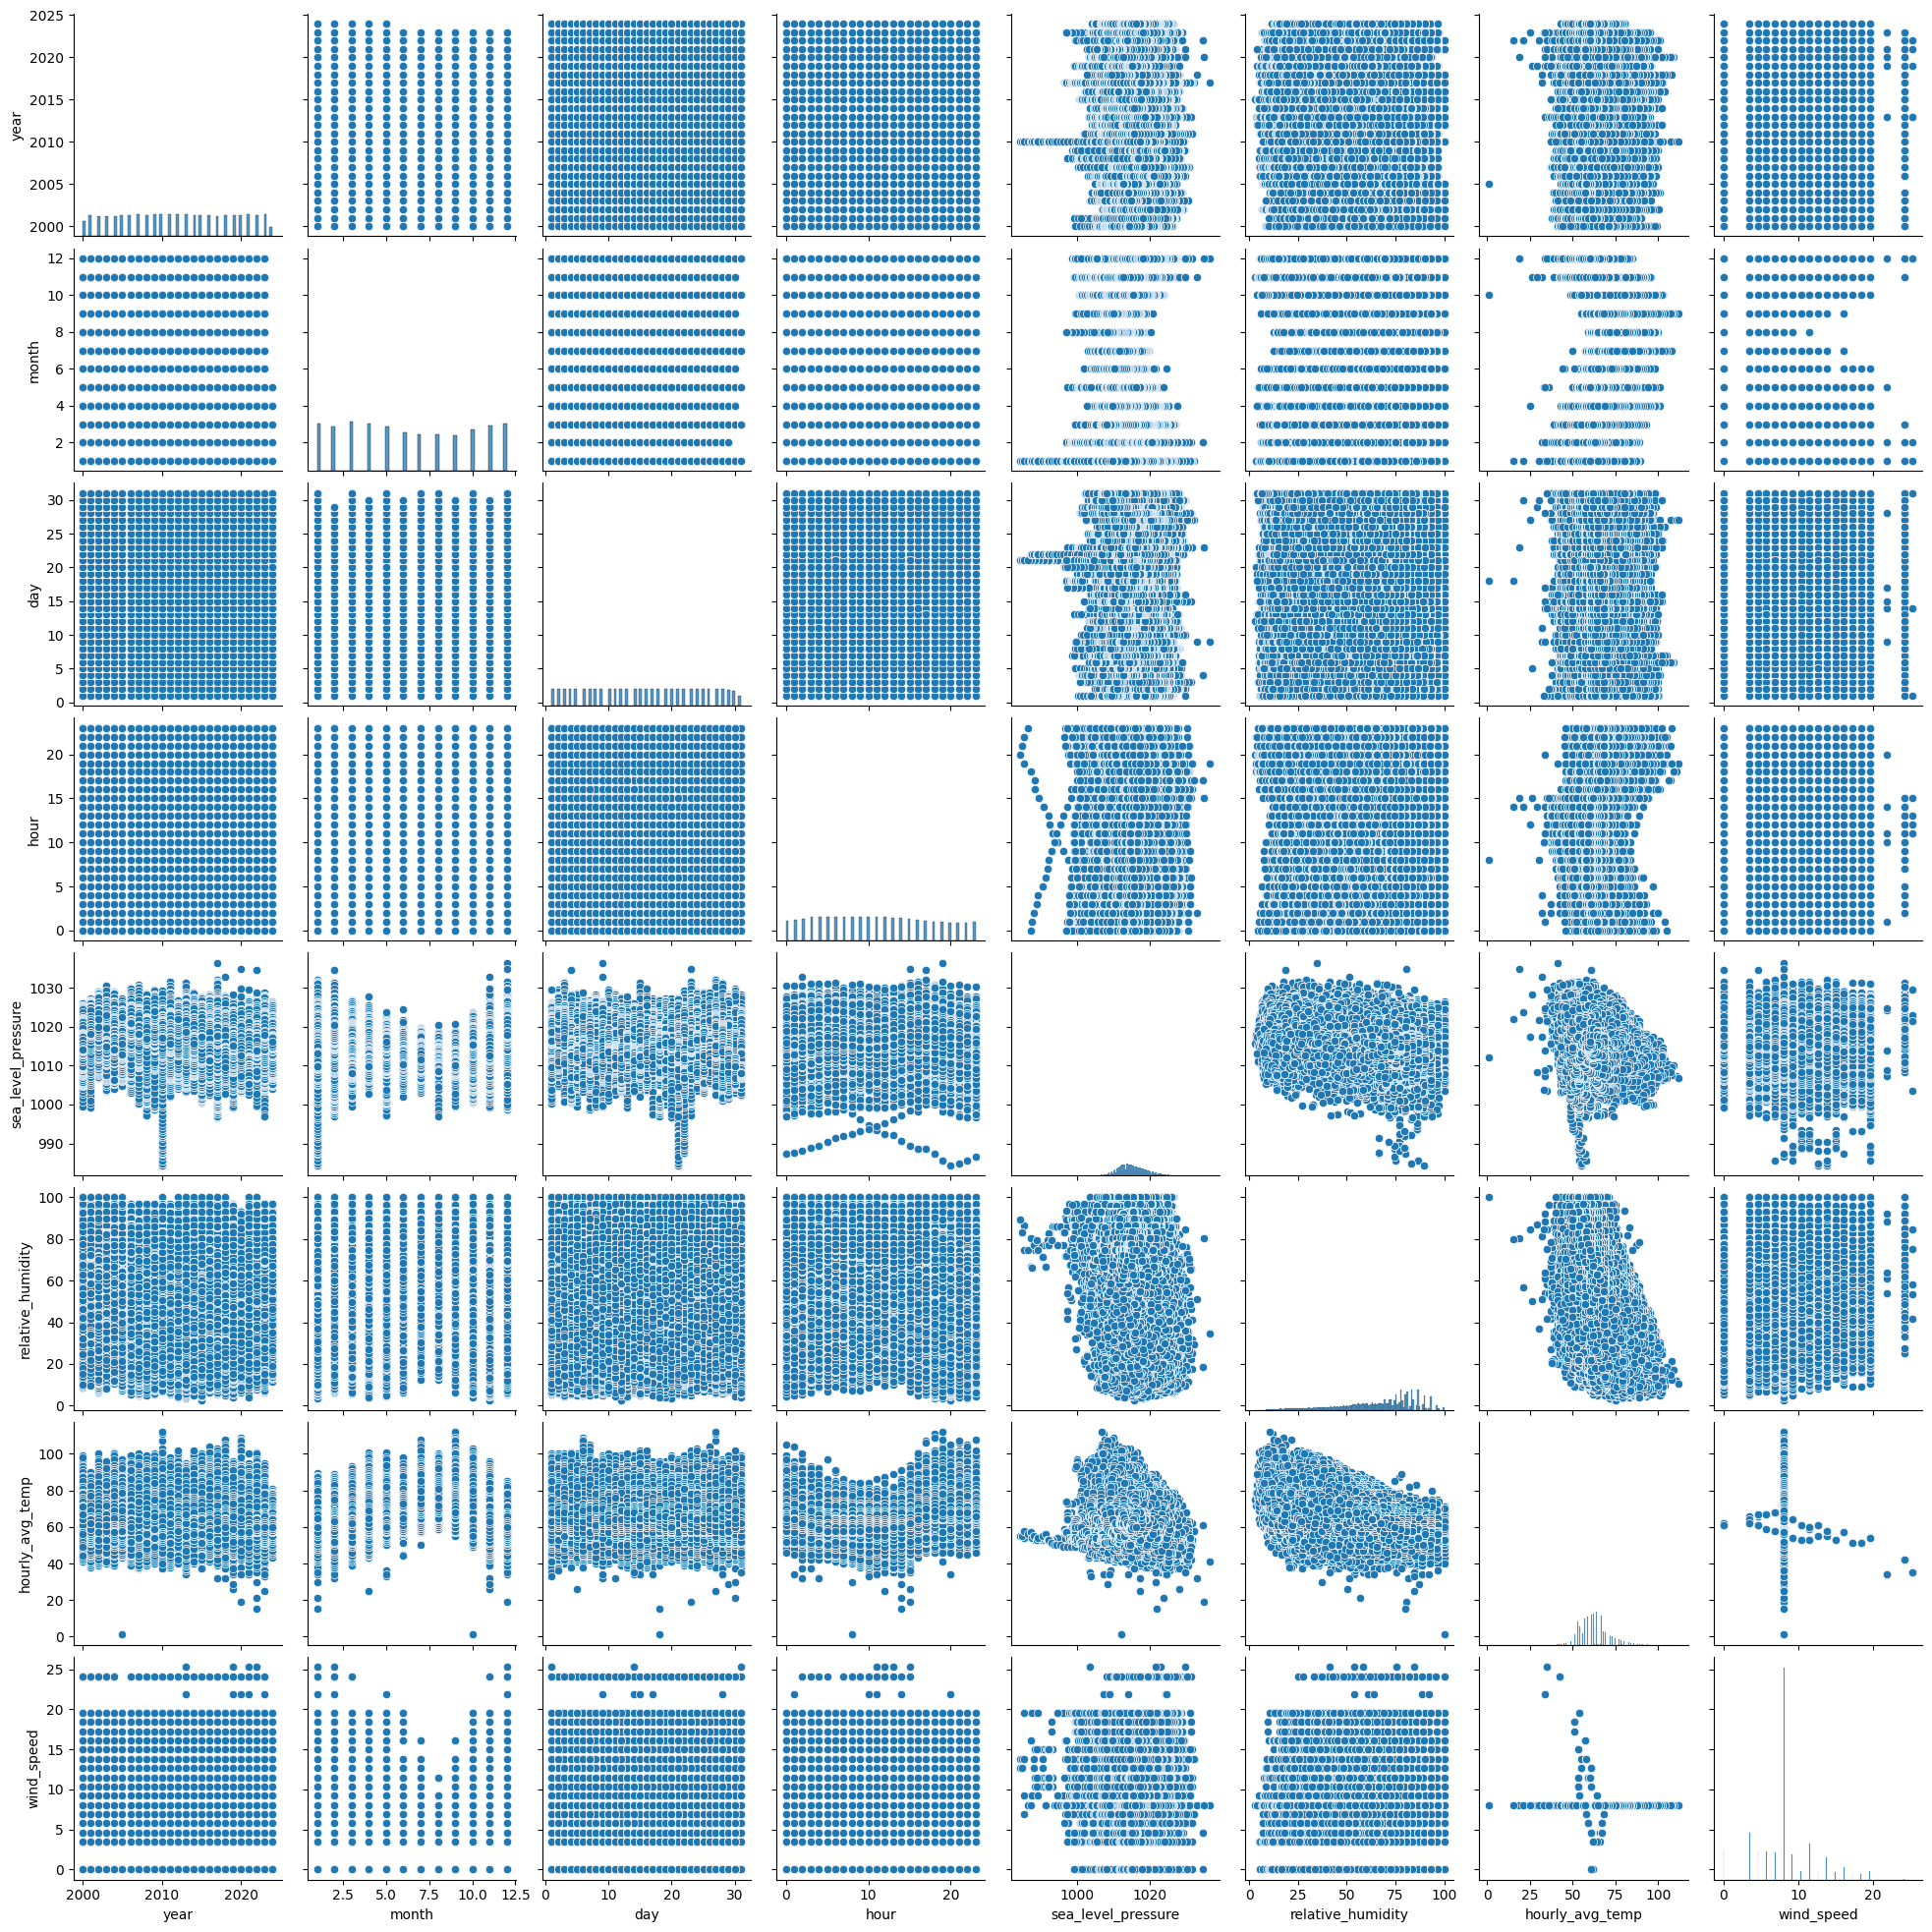

In [25]:
result['sea_level_pressure'] = pd.to_numeric(result['sea_level_pressure'], errors='coerce') # Convert to numeric, invalid parsing will be set as NaN
result['sea_level_pressure'].fillna(result['sea_level_pressure'].mean(), inplace=True)

result['relative_humidity'] = pd.to_numeric(result['relative_humidity'], errors='coerce') # Convert to numeric, invalid parsing will be set as NaN
result['relative_humidity'].fillna(result['relative_humidity'].mean(), inplace=True)

# Fill missing values if necessary
result['sea_level_pressure'].fillna(result['sea_level_pressure'].mean(), inplace=True)
result['relative_humidity'].fillna(result['relative_humidity'].mean(), inplace=True)
# Convert 'wind_speed' to numeric, handling errors
result['wind_speed'] = pd.to_numeric(result['wind_speed'], errors='coerce')

# Fill missing values in 'wind_speed' with the median of valid numeric values
result['wind_speed'].fillna(result['wind_speed'].median(), inplace=True)

# Ensure all columns are of the correct data type
result['year'] = result['year'].astype(int)
result['month'] = result['month'].astype(int)
result['day'] = result['day'].astype(int)
result['hour'] = result['hour'].astype(int)

# Generate the pair plot including 'sea_level_pressure' and 'relative_humidity'
sns.pairplot(result[['year', 'month', 'day', 'hour', 'sea_level_pressure', 'relative_humidity', 'hourly_avg_temp', 'wind_speed']])
plt.show()

# Correlation Matrix

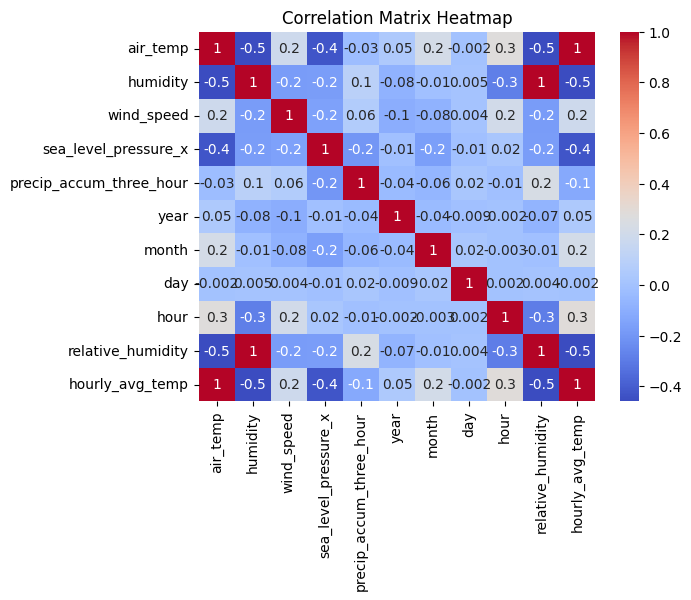

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Correlation Matrix

avg_weather_df['relative_humidity'] = avg_weather_df['relative_humidity'].astype('float64')

numeric_df = avg_weather_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1g')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Yearly Average Temperature Over Time Model

     year  yearly_avg_temp
0  2000.0        62.788479
1  2001.0        61.967393
2  2002.0        62.190844
3  2003.0        63.404508
4  2004.0        63.155874


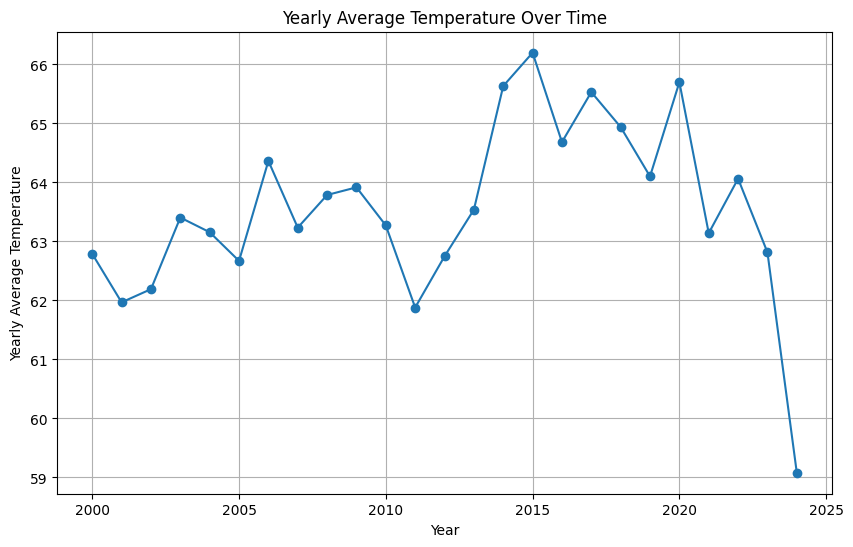

In [28]:
hourly_avg_temp_1 = hourly_avg_temp.rename(columns={'year': 'avg_temp_year', 'month': 'avg_temp_month'})

# Convert date_time to datetime format
avg_weather_df['date_time'] = pd.to_datetime(avg_weather_df['date_time'])

# Calculate the yearly average temperature
yearly_avg_temp = avg_weather_df.groupby('year')['air_temp'].mean().reset_index()
yearly_avg_temp.columns = ['year', 'yearly_avg_temp']

print(yearly_avg_temp.head())

# Plot the Yearly Average Temperatures
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_temp['year'], yearly_avg_temp['yearly_avg_temp'], marker='o')
plt.xlabel('Year')
plt.ylabel('Yearly Average Temperature')
plt.title('Yearly Average Temperature Over Time')
plt.grid(True)
plt.show()



# Splitting Data and Training Linear Regression

In [29]:
# Define Features and Target
X = result[['year', 'sea_level_pressure', 'wind_speed', 'relative_humidity']]
y = result['hourly_avg_temp']

X.dropna(inplace=True)
y = y[X.index]

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(X)
print(y)

<ipython-input-29-124b9251a4a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


Mean Squared Error: 41.666441567314976
R^2 Score: 0.4155437233721586
        year  sea_level_pressure  wind_speed  relative_humidity
0       2000              1018.3        8.06              56.10
1       2000              1018.2        8.06              62.60
2       2000              1018.3        8.06              83.20
3       2000              1018.4        8.06              86.50
4       2000              1018.8        8.06              93.00
...      ...                 ...         ...                ...
293914  2024              1014.7        5.75              77.52
293915  2024              1014.9       11.50              77.52
293916  2024              1014.9        5.75              77.52
293917  2024              1015.5       11.51              74.59
293918  2024              1016.1       11.51              74.59

[293919 rows x 4 columns]
0         64.90
1         63.00
2         57.00
3         55.90
4         54.00
          ...  
293914    59.00
293915    59.00
293916  

# Encoding and Normalization

In [30]:
from sklearn.preprocessing import MinMaxScaler

hourly_avg_temp['hourly_avg_temp'].fillna(hourly_avg_temp['hourly_avg_temp'].mean(), inplace=True)
hourly_avg_wind['hourly_avg_wind'].fillna(hourly_avg_wind['hourly_avg_wind'].median(), inplace=True)
hourly_avg_sea['hourly_avg_sea'].fillna(hourly_avg_sea['hourly_avg_sea'].mean(), inplace=True)

hour_column = hourly_avg_temp['hour']
feature_temp = hourly_avg_temp[['hourly_avg_temp']]
feature_wind = hourly_avg_wind[['hourly_avg_wind']]
feature_sea = hourly_avg_sea[['hourly_avg_sea']]

combined_df = pd.concat([hour_column, feature_temp, feature_wind, feature_sea], axis=1).dropna()

hourly_avg_temp['hourly_avg_temp'].fillna(hourly_avg_temp['hourly_avg_temp'].mean(), inplace=True)
hourly_avg_wind['hourly_avg_wind'].fillna(hourly_avg_wind['hourly_avg_wind'].median(), inplace=True)
hourly_avg_sea['hourly_avg_sea'].fillna(hourly_avg_sea['hourly_avg_sea'].mean(), inplace=True)

# After dropping NaNs, re-extract the columns
hour_column_clean = combined_df['hour']
feature_temp_clean = combined_df[['hourly_avg_temp']]
feature_wind_clean = combined_df[['hourly_avg_wind']]
feature_sea_clean = combined_df[['hourly_avg_sea']]

# Normalize temperature and wind speed features
scaler_temp = MinMaxScaler()
normalized_temp = scaler_temp.fit_transform(feature_temp_clean)
processed_temp = pd.DataFrame(normalized_temp, columns=['hourly_avg_temp'])

scaler_wind = MinMaxScaler()
normalized_wind = scaler_wind.fit_transform(feature_wind_clean)
processed_wind = pd.DataFrame(normalized_wind, columns=['hourly_avg_wind'])

scaler_wind = MinMaxScaler()
normalized_sea = scaler_wind.fit_transform(feature_sea_clean)
processed_sea = pd.DataFrame(normalized_wind, columns=['hourly_avg_sea'])

scaler_wind = MinMaxScaler()
normalized_hum = scaler_wind.fit_transform(feature_sea_clean)
processed_hum = pd.DataFrame(normalized_hum, columns=['hourly_avg_hum'])

# Input features (X)
X = hour_column_clean.values.reshape(-1, 1)

# Target labels (y) - Combine processed_temp and processed_wind
y = pd.concat([processed_temp, processed_wind, processed_sea, processed_hum], axis=1)

# Verify the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

print("Input features (X):")
print(X)
print("Target labels (y):")
print(y)

print("Checking for NaNs in input features (X):", np.isnan(X).any())
print("Checking for NaNs in target labels (y):", y.isna().any().any())

Shape of X: (205642, 1)
Shape of y: (205642, 4)
Input features (X):
[[21.]
 [22.]
 [ 1.]
 ...
 [12.]
 [13.]
 [14.]]
Target labels (y):
        hourly_avg_temp  hourly_avg_wind  hourly_avg_sea  hourly_avg_hum
0              0.575938         0.293817        0.293817        0.650672
1              0.558802         0.235565        0.235565        0.648752
2              0.504690         0.000000        0.000000        0.650672
3              0.494769         0.000000        0.000000        0.652591
4              0.477633         0.000000        0.000000        0.660269
...                 ...              ...             ...             ...
205637         0.522727         0.000000        0.000000        0.664107
205638         0.522727         0.000000        0.000000        0.669866
205639         0.522727         0.000000        0.000000        0.664107
205640         0.532468         0.176290        0.176290        0.648752
205641         0.532468         0.000000        0.000000      

## Neural Network

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, recall_score, ConfusionMatrixDisplay

# Prepare input features (X) and target labels (y)
X = X
y = y

if X.shape[0] != y.shape[0]:
    min_samples = min(X.shape[0], y.shape[0])
    X = X.iloc[:min_samples, :]
    y = y.iloc[:min_samples, :]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(8, activation='relu'))  # Hidden layer 1
model.add(Dense(4, activation='relu'))  # Hidden layer 2
model.add(Dense(y_train.shape[1], activation='relu'))  # Output layer

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.3), loss='mse', metrics=['mse'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
model.summary()

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5206/5206 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1834 - mse: 0.1834 - val_loss: 0.1827 - val_mse: 0.1827
Epoch 2/20
5206/5206 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.1827 - mse: 0.1827 - val_loss: 0.1827 - val_mse: 0.1827
Epoch 3/20
5206/5206 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1827 - mse: 0.1827 - val_loss: 0.1827 - val_mse: 0.1827
Epoch 4/20
5206/5206 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1826 - mse: 0.1826 - val_loss: 0.1827 - val_mse: 0.1827
Epoch 5/20
5206/5206 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.1830 - mse: 0.1830 - val_loss: 0.1827 - val_mse: 0.1827
Epoch 6/20
5206/5206 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1828 - mse: 0.1828 - val_loss: 0.1827 - val_mse: 0.1827
Epoch 7/20
5206/5206 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.1827 - mse: 0.1827 - val_loss: 0.1827 - val_mse: 0.1827
Epoch 8/20
5206/5206 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1828 - mse: 0.1828 - val_loss: 0.1827 - val_mse: 0.1827
Epoch 9/20
5206/5206 ━━━━━━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186 (748.00 B)

 Trainable params: 184 (736.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

643/643 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [32]:
X_train

array([[23.],
       [16.],
       [14.],
       ...,
       [17.],
       [17.],
       [ 1.]])

#  K-Nearest Neighbors

Mean Squared Error for Temperature: 0.0052372348012981775
Mean Squared Error for Wind Speed: 0.018628279767231744
Mean Squared Error for Sea Pressure: 0.0066077453574912995


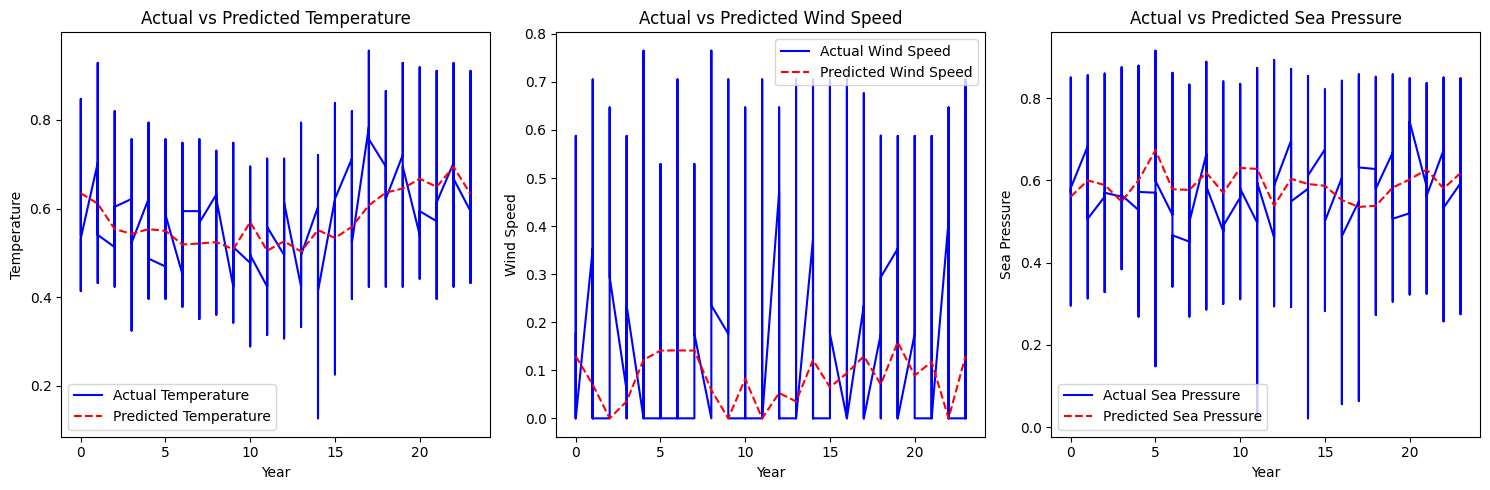

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

hour_column = hourly_avg_temp['hour']
feature_temp = hourly_avg_temp[['hourly_avg_temp']]
feature_wind = hourly_avg_wind[['hourly_avg_wind']]
feature_sea = hourly_avg_sea[['hourly_avg_sea']]

# Combine the DataFrames
combined_df = pd.concat([hour_column, feature_temp, feature_wind, feature_sea], axis=1).dropna()

# Verify combined DataFrame shape and column names
print(combined_df.shape)
print(combined_df.columns)

# Re-extract the columns after dropping NaNs
hour_column_clean = combined_df['hour']
feature_temp_clean = combined_df[['hourly_avg_temp']]
feature_wind_clean = combined_df[['hourly_avg_wind']]
feature_sea_clean = combined_df[['hourly_avg_sea']]

# Normalize temperature, wind speed, and sea pressure features
scaler_temp = MinMaxScaler()
normalized_temp = scaler_temp.fit_transform(feature_temp_clean)
processed_temp = pd.DataFrame(normalized_temp, columns=['hourly_avg_temp'])

scaler_wind = MinMaxScaler()
normalized_wind = scaler_wind.fit_transform(feature_wind_clean)
processed_wind = pd.DataFrame(normalized_wind, columns=['hourly_avg_wind'])

scaler_sea = MinMaxScaler()
normalized_sea = scaler_sea.fit_transform(feature_sea_clean)
processed_sea = pd.DataFrame(normalized_sea, columns=['hourly_avg_sea'])

# Combine normalized features
y = pd.concat([processed_temp, processed_wind, processed_sea], axis=1)

# Verify the shape and column names of y
print(y.shape)
print(y.columns)


X = hour_column_clean.values.reshape(-1, 1)


print(X.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_model = KNeighborsRegressor(n_neighbors=5)


knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse_temp = mean_squared_error(y_test.iloc[:, 0], y_pred[:, 0])
mse_wind = mean_squared_error(y_test.iloc[:, 1], y_pred[:, 1])
mse_sea = mean_squared_error(y_test.iloc[:, 2], y_pred[:, 2])

print(f"Mean Squared Error for Temperature: {mse_temp}")
print(f"Mean Squared Error for Wind Speed: {mse_wind}")
print(f"Mean Squared Error for Sea Pressure: {mse_sea}")

plt.figure(figsize=(15, 5))

# Sort by hour to make the line plot meaningful
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test.flatten()[sorted_indices]

# Plot for Temperature
plt.subplot(1, 3, 1)
plt.plot(X_test_sorted, y_test.iloc[sorted_indices, 0], label='Actual Temperature', color='blue')
plt.plot(X_test_sorted, y_pred[sorted_indices, 0], label='Predicted Temperature', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()

# Plot for Wind Speed
plt.subplot(1, 3, 2)
plt.plot(X_test_sorted, y_test.iloc[sorted_indices, 1], label='Actual Wind Speed', color='blue')
plt.plot(X_test_sorted, y_pred[sorted_indices, 1], label='Predicted Wind Speed', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Wind Speed')
plt.title('Actual vs Predicted Wind Speed')
plt.legend()

# Plot for Sea Pressure
plt.subplot(1, 3, 3)
plt.plot(X_test_sorted, y_test.iloc[sorted_indices, 2], label='Actual Sea Pressure', color='blue')
plt.plot(X_test_sorted, y_pred[sorted_indices, 2], label='Predicted Sea Pressure', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Sea Pressure')
plt.title('Actual vs Predicted Sea Pressure')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# !jupyter nbconvert --to html /content/CSE_151A_Project.ipynb

[NbConvertApp] WARNING | pattern '/content/CSE_151A_Project.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]